# Estadística descriptiva con Python

#### Vamos a leer un conjunto de datos

In [2]:
import pandas as pd

In [10]:
iris = pd.read_csv('iris_data.txt', sep=",")

Cabecera de la tabla para hacernos una idea de cómo es:

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Tipos de datos en Python:
    

In [12]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Más información acerca de mi tabla:

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Tabla de frecuencias:

Vamos a generarla para la variable petal_width

Vemos antes de nada cómo es esta variable:

In [39]:
iris['petal_width'].describe()

2.5


Esta variable la vamos a categorizar convirtiéndola en una con tres categorías:
    - que el valor sea <=1
    - que el valor esté entre 1 y 2
    - que el valor sea >= 2
sabiendo que el mínimo es 1 y el máximo 2.5.

In [15]:
iris['nueva_variable'] = 'sin categoria'
iris.loc[(iris.petal_width<=1),'nueva_variable'] = '1. <= 1' 
iris.loc[(iris.petal_width>1) & (iris.petal_width<2),'nueva_variable'] = '2. 1-2' 
iris.loc[(iris.petal_width>=2),'nueva_variable'] = '3. >= 2' 

Vemos cómo queda ahora el dataframe con la nueva variable:

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,nueva_variable
0,5.1,3.5,1.4,0.2,setosa,1. <= 1
1,4.9,3.0,1.4,0.2,setosa,1. <= 1
2,4.7,3.2,1.3,0.2,setosa,1. <= 1
3,4.6,3.1,1.5,0.2,setosa,1. <= 1
4,5.0,3.6,1.4,0.2,setosa,1. <= 1


Ahora voy a crear la tabla de frecuencias. 
En particular, calculo las frecuencias absolutas:

In [26]:
frecuencias = pd.crosstab(index=iris["nueva_variable"],columns="frec_abs")

#frecuencias = iris.groupby("nueva_variable").size().reset_index(name='frec_abs')
#frecuencias = pd.value_counts(iris['nueva_variable'])
print(frecuencias)

col_0           frec_abs
nueva_variable          
1. <= 1               57
2. 1-2                64
3. >= 2               29


Añado las frecuencias relativas:

In [20]:
frecuencias["frec_rel"] = iris["nueva_variable"].value_counts() / len(iris["nueva_variable"])

Añado las frecuencias porcentuales:

In [21]:
frecuencias["frec_por"] = 100* frecuencias["frec_rel"]
print(frecuencias)

col_0           frec_abs  frec_rel   frec_por
nueva_variable                               
1. <= 1               57  0.380000  38.000000
2. 1-2                64  0.426667  42.666667
3. >= 2               29  0.193333  19.333333


In [22]:
frecuencias_acum = frecuencias[["frec_abs","frec_rel"]].cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum"})
print(frecuencias_acum)
#Esto sería haciendo también el acumulado de frec_por
#frecuencias_acum = frecuencias.cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum", "frec_por":"frec_por_acum"})

col_0           frec_abs_acum  frec_rel_acum
nueva_variable                              
1. <= 1                    57       0.380000
2. 1-2                    121       0.806667
3. >= 2                   150       1.000000


In [28]:
tabla_frecuencias = pd.concat([frecuencias, frecuencias_acum], axis=1)
print(tabla_frecuencias)

col_0           frec_abs  frec_abs_acum  frec_rel_acum
nueva_variable                                        
1. <= 1               57             57       0.380000
2. 1-2                64            121       0.806667
3. >= 2               29            150       1.000000


### $\color{red}{\text{Ejercicio 1: Calcular las tablas de frecuencias para el resto de variables del dataframe.}}$

In [48]:
import math

In [49]:
iris['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [111]:
min_value = math.floor(iris["sepal_length"].min())
max_value = math.ceil(iris["sepal_length"].max())
iris['sepal_category'] = 'no category'
for i in range(min_value, max_value):
    iris.loc[(i < iris.sepal_length) & (iris.sepal_length <= (i + 1)), 'sepal_category'] = f"<= {i + 1}"
sepal_frec = pd.crosstab(index=iris["sepal_category"],columns="frec_abs")
sepal_frec["frec_rel"] = iris["sepal_category"].value_counts() / len(iris["sepal_category"])
sepal_frec["frec_por"] = 100 * sepal_frec["frec_rel"]
sepal_frec_acum = sepal_frec[["frec_abs","frec_rel"]].cumsum().rename(columns={"frec_abs":"frec_abs_acum","frec_rel":"frec_rel_acum"})
sepal_frec = pd.concat([sepal_frec, sepal_frec_acum], axis = 1)
print(sepal_frec)

col_0           frec_abs  frec_rel   frec_por  frec_abs_acum  frec_rel_acum
sepal_category                                                             
<= 5                  32  0.213333  21.333333             32       0.213333
<= 6                  57  0.380000  38.000000             89       0.593333
<= 7                  49  0.326667  32.666667            138       0.920000
<= 8                  12  0.080000   8.000000            150       1.000000


### $\color{red}{\text{Ejercicio 2: Calcular frecuencias absolutas y relativas combinadas de dos variables.}}$

In [ ]:
##consultar vbles declaradas
#dir()
#
##borrar
#%reset -f
#del(vble)

### Medidas de posición centrales:

Vamos a calcular la media y la mediana de la variable "sepal_length" y la moda de la variable "species"

In [99]:
iris.mean()

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [100]:
iris[["sepal_length"]].mean()

sepal_length    5.843333
dtype: float64

In [98]:
iris[["sepal_length", "petal_length"]].mean()

sepal_length    5.843333
petal_length    3.758667
dtype: float64

In [80]:
iris[["sepal_length"]].median()

sepal_length    5.8
dtype: float64

In [82]:
iris[["sepal_length"]].mode()

,sepal_length
0,5.0


Parece que los valores de la media y la mediana son muy próximos.

In [81]:
iris[["species"]].mode()

,species
0,setosa
1,versicolor
2,virginica


¿Qué está pasando?

Vamos a sacarnos una tabla con el número de registros de cada clase para ver por qué no me está sacando el que más se repite:

In [83]:
pd.value_counts(iris['species'])

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Es una variable trimodal (tiene 3 modas)

Veamos cuál es la moda de la variable que creamos para categorizar nuestra vble original "petal_width"

In [87]:
iris[["nueva_variable"]].mode()

,nueva_variable
0,2. 1-2


In [88]:
iris[["sepal_category"]].mode()

,sepal_category
0,<= 6


Esta variable sí que tiene una única moda.

### Medidas de posición no centrales:

Veamos los cuartiles:

In [89]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Donde: 
- cuartil 1 se corresponde con el 25%, 
- cuartil 2 con el 50%, que a su vez es la mediana, 
- cuartil 3 con el 75% y 
- cuartil 4 con el max

Vemos por tanto que de esta forma, además de los cuartiles, también obtenemos la media (mean) y la mediana (50%) de forma directa.

Calculemos los percentiles:

In [92]:
iris.quantile(0.50)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

In [94]:
iris["sepal_length"].quantile(0.95)

7.254999999999998

In [133]:
iris.sepal_length.quantile(0.95)

7.254999999999998

Calculemos los extremos:

In [110]:
iris[["sepal_length"]].min()

sepal_length    4.3
dtype: float64

In [108]:
iris[["sepal_length", "petal_length"]].max()

sepal_length    7.9
petal_length    6.9
dtype: float64

### $\color{red}{\text{Ejercicio 3: Calcular el Rango Intercuartílico de cada variable.}}$

In [103]:
iris.quantile(0.75)-iris.quantile(0.25)

sepal_length    1.3
sepal_width     0.5
petal_length    3.5
petal_width     1.5
dtype: float64

### Medidas de dispersión:

Calculamos el rango de la variable 'sepal_length':

In [112]:
iris[['sepal_length']].max() - iris[['sepal_length']].min()

sepal_length    3.6
dtype: float64

Calculamos la varianza de la variable 'sepal_length':

In [113]:
iris[['sepal_length']].var()

sepal_length    0.685694
dtype: float64

Calculamos la desviación típica de la variable 'sepal_length':

In [132]:
iris[['sepal_length']].std()

sepal_length    0.828066
dtype: float64

Podemos además representar las variables gráficamente utilizando un boxplot, para tener una visión de cómo de dispersas están nuestras variables.

<AxesSubplot:>

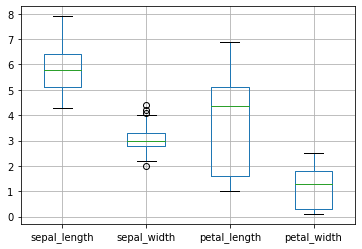

In [116]:
iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

### $\color{red}{\text{Ejercicio 4: Calcular rango, varianza y desviación típica de cada variable.}}$

In [119]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [120]:
iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].max()-iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].min()

sepal_length    3.6
sepal_width     2.4
petal_length    5.9
petal_width     2.4
dtype: float64

In [121]:
iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].var()

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64

In [122]:
iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].std()

sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64

### $\color{red}{\text{Ejercicio 5: Calcular el coeficiente de variación de Pearson de cada variable para concluir cuál es la que presenta menor variación con respecto a las demás.}}$

In [125]:
iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].std()/iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].mean()

sepal_length    0.141711
sepal_width     0.141976
petal_length    0.469427
petal_width     0.636675
dtype: float64

### Medidas de forma:

Vamos a calcular el coeficiente de asimetría de cada una de las variables mediante la función 'skew':

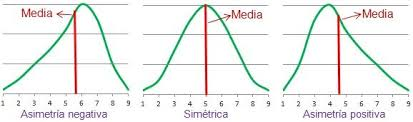

In [126]:
iris.skew()

sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64

Vamos a calcular la curtosis de cada variable con el método .kurt(). 
<br>Este método resta 3 automáticamente, de manera que la comparación la hacemos con 0 o le podemos sumar 3 y comparar como habíamos especificado antes con 3.

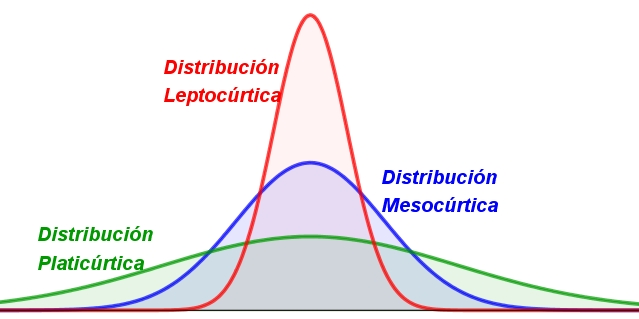

In [127]:
iris.kurt()

sepal_length   -0.552064
sepal_width     0.290781
petal_length   -1.401921
petal_width    -1.339754
dtype: float64

### $\color{red}{\text{Ejercicio 6: Representar gráficamente las distribuciones de estas variables marcando dónde están su media y su mediana.}}$

### Correlación entre variables:

In [128]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [141]:
iris[["sepal_length", "sepal_width"]].corr()

,sepal_length,sepal_width
sepal_length,1.000000,-0.109369
sepal_width,-0.109369,1.000000


Representemos visualmente la correlación existente entre sepal_length y sepal_width con un gráfico de dispersión.
<br> Para ello vamos a cargar la libreria matplotlib

In [129]:
import matplotlib.pyplot as plt

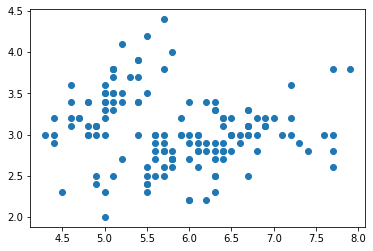

In [130]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width)
plt.show()

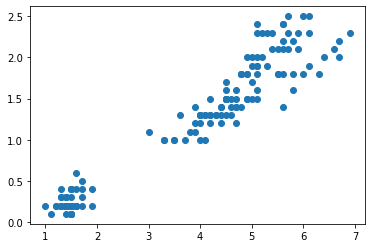

In [142]:
fig, ax = plt.subplots()
ax.scatter(iris.petal_length, iris.petal_width)
plt.show()

Ni a través del coeficiente ni gráficamente se aprecia relación entre estas dos variables. 
<br> Intentemos representarlo de nuevo pero distinguiendo según la especie.

In [136]:
# Creamos el vector de colores, para que, en función de la vble class pinte los puntos de un color u otro
colores = {"setosa":"RoyalBlue", "versicolor":"Crimson","virginica":"DarkGreen"}
class_colores = iris['species'].map(colores)

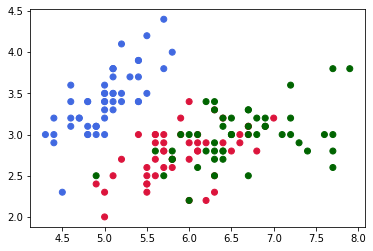

In [137]:
fig, ax = plt.subplots()
ax.scatter(iris.sepal_length, iris.sepal_width, color=class_colores)
plt.show()

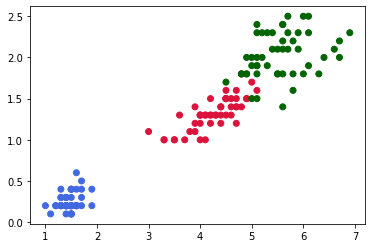

In [143]:
fig, ax = plt.subplots()
ax.scatter(iris.petal_length, iris.petal_width, color=class_colores)
plt.show()

Vamos a añadirle la leyenda para saber de qué especie o clase estamos hablando en cada caso:

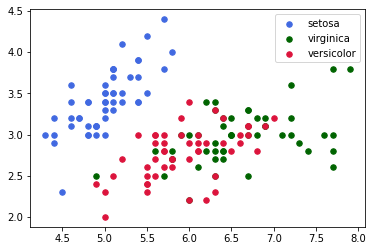

In [138]:
fig, ax = plt.subplots()
for species in set(iris['species']):
    ax.scatter(
        iris.sepal_length[iris.species == species],
        iris.sepal_width[iris.species == species],
        s = 30,
        c = colores[species],
        label = species)
plt.legend()
plt.show()

In [144]:
iris[iris.species == "setosa"].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


In [148]:
iris[iris.species == "setosa"].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


In [147]:
iris[iris.species == "setosa"].corr().sepal_length.petal_length

0.26387409291868696